# Apple Tweets Modeling

In [ ]:
import numpy as np
import pandas as pd
import pickle
import datetime as dt
import random
from scipy import sparse
import os
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

from helper_functions import display_topics

### Load tweet data

In [2]:
# read pickle for df
df = pd.read_pickle('data/tweet_clean.pkl')

# read pickle for df first tweet user
df_first_tweet_user = pd.read_pickle('data/df_first_tweet_user.pkl')

# read pickle for df convo user
df_convo_user = pd.read_pickle('data/df_convo_user.pkl')

### Vectorize user tweet conversations

In [97]:
# vectorize text data using tf-idf vectorizer
my_additional_stop_words = ['apple', 'applesupport', 'want', 'hey', 'hi', 'hello', 'http', 'thank', 'thanks', 'ok', 'yes', 'pls', 'plz', 'know', 'going', 'like', 'really', 'la', 'le', 'que', 'question', 'mark']
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

tfidf_convo_user = TfidfVectorizer(stop_words=my_stop_words, max_df=0.10, min_df=0.001, ngram_range=(1,3))
doc_word_convo_user = tfidf_convo_user.fit_transform(df_convo_user.text_clean)

df_convo_user_vec = pd.DataFrame(doc_word_convo_user.toarray(), index=df_convo_user.text_clean, columns=tfidf_convo_user.get_feature_names())

In [98]:
df_convo_user_vec.shape

(58578, 1835)

In [100]:
df_convo_user_vec.sample(1)

,ability,able,able use,absolute,absolutely,accept,access,accidentally,account,act,...,yeah,year,year ago,year old,yep,yesterday,yo,youtube,yup,zero
text_clean,,,,,,,,,,,,,,,,,,,,,
applesupport yup think software issue applesupport updated io applesupport every time listen podcast spotify consistent issue applesupport software issue listening podcast rn control center show http co,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225283,0.0


## Explore Topics on user tweet conversations

### Topic Modeling

In [101]:
# use NMF model to reduce dimensionality to some # of topics
nmf_model_convo_user = NMF(25)
doc_topic_convo_user = nmf_model_convo_user.fit_transform(doc_word_convo_user)

In [102]:
# topics by words
nmf_model_convo_user.components_.shape

(25, 1835)

In [103]:
# distribution of words by topic
np.unique(doc_topic_convo_user.argmax(axis=1), return_counts = True)[1]

array([4966, 4172, 1123, 2055, 2088, 2982, 2123, 1669, 1153, 2157, 1454,
       1596, 2285, 1511, 2405, 1064, 3130, 2131, 1606, 1508, 1955, 4099,
       6028, 1872, 1446])

In [104]:
# topics by words into dataframe
topic_word_convo_user = pd.DataFrame(nmf_model_convo_user.components_.round(3),
                         #index = ["component_1", "component_2", "component_3", "component_4"]
                         columns = tfidf_convo_user.get_feature_names())

topic_word_convo_user.head()

,ability,able,able use,absolute,absolutely,accept,access,accidentally,account,act,...,yeah,year,year ago,year old,yep,yesterday,yo,youtube,yup,zero
0,0.030,0.278,0.019,0.007,0.012,0.017,0.224,0.045,1.77,0.019,...,0.099,0.095,0.038,0.000,0.030,0.192,0.059,0.000,0.004,0.015
1,0.000,0.000,0.000,0.010,0.041,0.000,0.000,0.000,0.00,0.002,...,0.001,0.060,0.003,0.027,0.000,0.019,0.007,0.017,0.004,0.011
2,0.004,0.000,0.019,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.002,0.000,0.000,0.000,0.001,0.000,0.081,0.000,0.000,0.000
3,0.000,0.032,0.001,0.000,0.000,0.005,0.000,0.000,0.00,0.003,...,0.016,0.009,0.000,0.004,0.000,0.014,0.010,0.007,0.001,0.004
4,0.002,0.016,0.000,0.000,0.008,0.005,0.000,0.000,0.00,0.000,...,0.011,0.007,0.000,0.000,0.008,0.029,0.001,0.007,0.007,0.007


In [105]:
# display top words corresponding to each topic
display_topics(nmf_model_convo_user, tfidf_convo_user.get_feature_names(), 5)


Topic  0
email, message, got, text, getting

Topic  1
battery, life, battery life, drain, battery drain

Topic  2
letter, type letter, eye, letter eye, use

Topic  3
issue, fix issue, fixed, issue iphone, issue io

Topic  4
problem, fix problem, fixed, problem iphone, solve

Topic  5
new, new update, new io, new iphone, new phone

Topic  6
work, tried, phone work, work phone, fine

Topic  7
updated, updated phone, updated io, updated iphone, seeing

Topic  8
need, need help, need fix, possible, soon

Topic  9
app, store, app store, download, open

Topic  10
shit, fix shit, fucking, fuck, yo

Topic  11
plus, iphone plus, plus io, iphone plus io, io iphone plus

Topic  12
music, song, itunes, play, playing

Topic  13
dm, sent, sent dm, check, check dm

Topic  14
screen, lock, lock screen, black, home

Topic  15
happening, thing, explain, started, started happening

Topic  16
time, day, time day, time type, phone time

Topic  17
turn, wifi, bluetooth, turning, control

Topic  18
glitch, 

In [106]:
# create doc topic dataframe
doc_topic_nmf_convo_user = pd.DataFrame(doc_topic_convo_user.round(5),
                             index = df_convo_user.text_clean)
doc_topic_nmf_convo_user.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
text_clean,,,,,,,,,,,,,,,,,,,,,
applesupport uh weirdness watchos update http co,0.00020,0.00005,0.0,0.00011,0.00034,0.00005,0.00000,0.00069,0.00006,0.00068,...,0.00034,0.00049,0.00000,0.00017,0.00043,0.00003,0.00000,0.00031,0.00056,0.00000
sure f happening io trying let battery run lie battery life hour applesupport sup widdat http co,0.00334,0.13684,0.0,0.00000,0.00000,0.00000,0.00064,0.00000,0.00000,0.00182,...,0.07868,0.00000,0.00000,0.00000,0.00000,0.00047,0.00000,0.00217,0.00000,0.00263
applesupport good thanks able send least half dozen animoji,0.00720,0.00347,0.0,0.00027,0.00058,0.00310,0.00396,0.00000,0.00028,0.00078,...,0.00019,0.00246,0.00107,0.00026,0.00032,0.00106,0.00168,0.00312,0.00081,0.00236


In [107]:
# get the diff between max and min date
df_convo_user['max_min_date_diff'] = df_convo_user.date_only_max - df_convo_user.date_only_min
df_convo_user = df_convo_user[['author_id', 'text', 'text_clean', 'date_only_min', 'date_only_max', 'max_min_date_diff']]

In [108]:
# get topic with max value for each document
doc_topic_nmf_convo_user['topic'] = doc_topic_nmf_convo_user.idxmax(axis=1)
doc_topic_nmf_convo_user = doc_topic_nmf_convo_user.reset_index()

In [109]:
# merge df convo user with topic
df_convo_user = pd.merge(df_convo_user, doc_topic_nmf_convo_user['topic'], left_index=True, right_index=True)

In [110]:
df_convo_user.head(5)

,author_id,text,text_clean,date_only_min,date_only_max,max_min_date_diff,topic
0,408,"@AppleSupport Uh, weirdness after watchOS 4.1 ...",applesupport uh weirdness watchos update http co,2017-11-02,2017-11-02,0 days,7
1,1437,I'm not sure what the F is happening with iOS ...,sure f happening io trying let battery run lie...,2017-11-17,2017-11-17,0 days,1
2,1501,@AppleSupport all good now thanks. i’ve been a...,applesupport good thanks able send least half ...,2017-11-03,2017-11-03,0 days,0
3,2084,@AppleSupport Just updated iTunes and it said ...,applesupport updated itunes said longer subscr...,2017-10-31,2017-10-31,0 days,12
4,3922,@AppleSupport Pretty sure it started with iOS ...,applesupport pretty sure started io seems happ...,2017-10-07,2017-10-08,1 days,16


### EDA

In [111]:
df_convo_user.date_only_min.sort_values()

6865    2016-03-04
56758   2016-04-04
52236   2016-09-06
23096   2016-10-01
57696   2016-10-06
           ...    
11336   2017-12-03
11337   2017-12-03
11338   2017-12-03
11340   2017-12-03
11089   2017-12-03
Name: date_only_min, Length: 58578, dtype: datetime64[ns]

In [112]:
df_convo_user[df_convo_user.date_only_min < '2016-04-05']

,author_id,text,text_clean,date_only_min,date_only_max,max_min_date_diff,topic
6865,202183,@AppleSupport Howdy. I will be upgrading my 7 ...,applesupport howdy upgrading x early morning a...,2016-03-04,2017-10-08,583 days,1
56758,790357,@AppleSupport i was just wondering how you get...,applesupport wondering get rid padlock icon to...,2016-04-04,2016-04-04,0 days,4


/Users/johnlee/opt/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


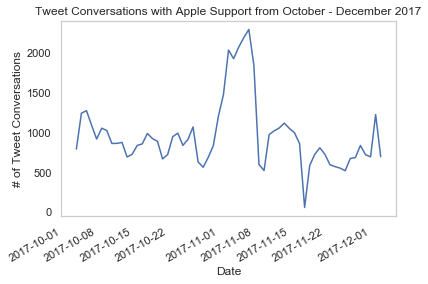

In [113]:
# plot tweet conversation volume from 10/04/17 to 12/03/17
df_convo_graph = df_convo_user.groupby(['date_only_min']).size().reset_index(name='counts')

sns.lineplot(data=df_convo_graph[df_convo_graph.date_only_min > '2017-10-03'], x='date_only_min', y='counts', color='b') 

plt.title('Tweet Conversations with Apple Support from October - December 2017')
plt.xlabel('Date')
plt.ylabel('# of Tweet Conversations')
plt.gcf().autofmt_xdate()
plt.savefig('conversation_volume.png');

In [114]:
# create dataframe for time series graph of topics
df_topic_graph = df_convo_user.groupby(['date_only_min', 'topic']).size().reset_index(name='counts')
df_topic_graph.head()

,date_only_min,topic,counts
0,2016-03-04,1,1
1,2016-04-04,4,1
2,2016-09-06,22,1
3,2016-10-01,21,1
4,2016-10-06,22,1


In [115]:
# total documents 
sum(df_topic_graph.counts)

58578

In [116]:
# total documents from Oct 4 - Dec 3 2017
sum(df_topic_graph[df_topic_graph.date_only_min > '2017-10-03'].counts)

58294

In [117]:
# percent of documents in entire dataset
58294 / 58578

0.9951517634606849

**58,294 of 58,578 tweets in date range (99.5%) from October 4, 2017 to December 3, 2017 (2 months)**

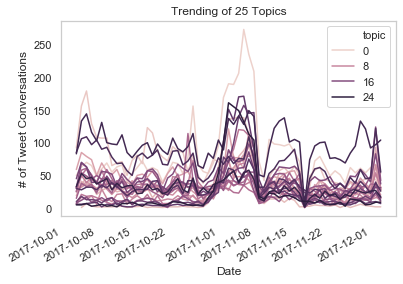

In [118]:
# plot volume of tweets by topic over time
sns.lineplot(data=df_topic_graph[df_topic_graph.date_only_min > '2017-10-03'], x='date_only_min', y='counts', hue='topic')

plt.title('Trending of 25 Topics')
plt.xlabel('Date')
plt.ylabel('# of Tweet Conversations')
plt.gcf().autofmt_xdate();

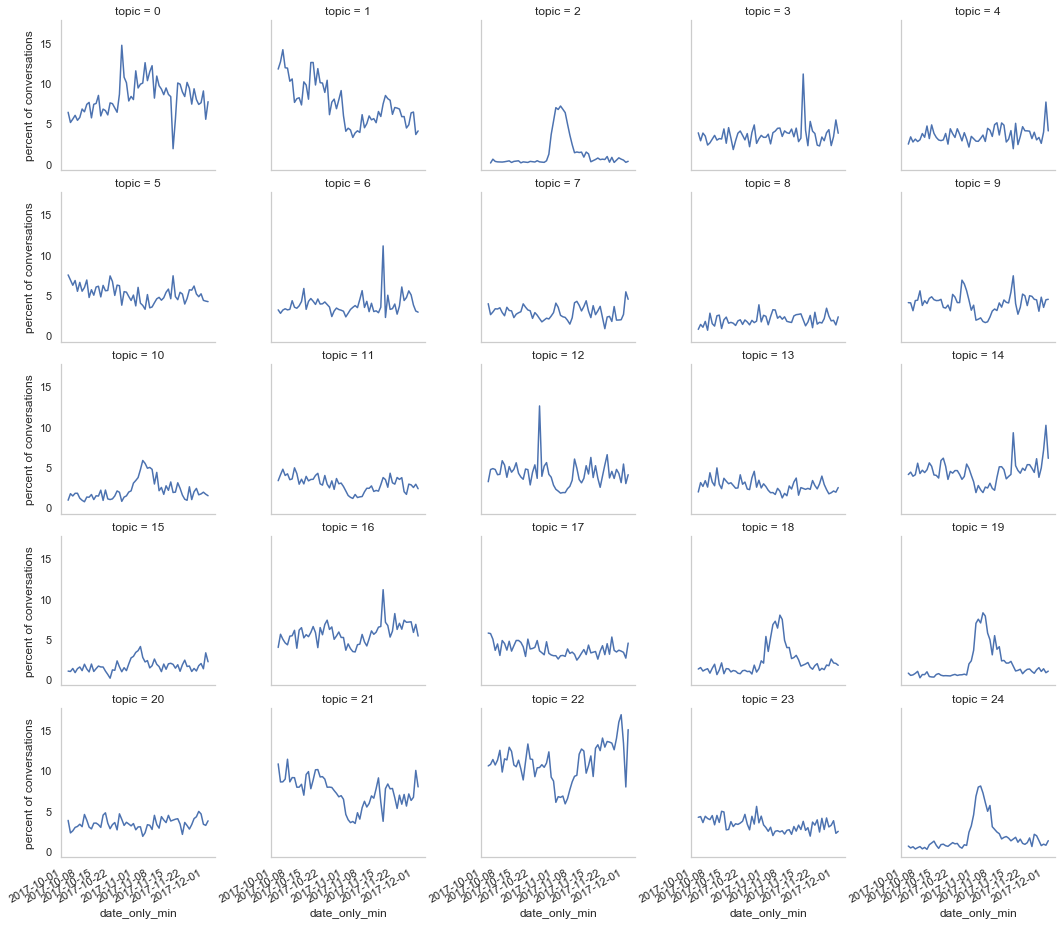

In [119]:
# create percent of all conversation per topic
df_topic_graph_pct = df_topic_graph.merge(df_convo_graph[['date_only_min', 'counts']], how='left', on='date_only_min')

df_topic_graph_pct['percent of conversations'] = (df_topic_graph_pct.counts_x / df_topic_graph_pct.counts_y) * 100

# plot percent of conversations by topic
g = sns.FacetGrid(df_topic_graph_pct[df_topic_graph_pct.date_only_min > '2017-10-03'], col="topic", col_wrap=5, height=3.0, aspect=1.0) 
g = g.map(plt.plot, "date_only_min", "percent of conversations", color='b') 
plt.gcf().autofmt_xdate()
plt.savefig('percent_daily_tweets_by_topic.png');

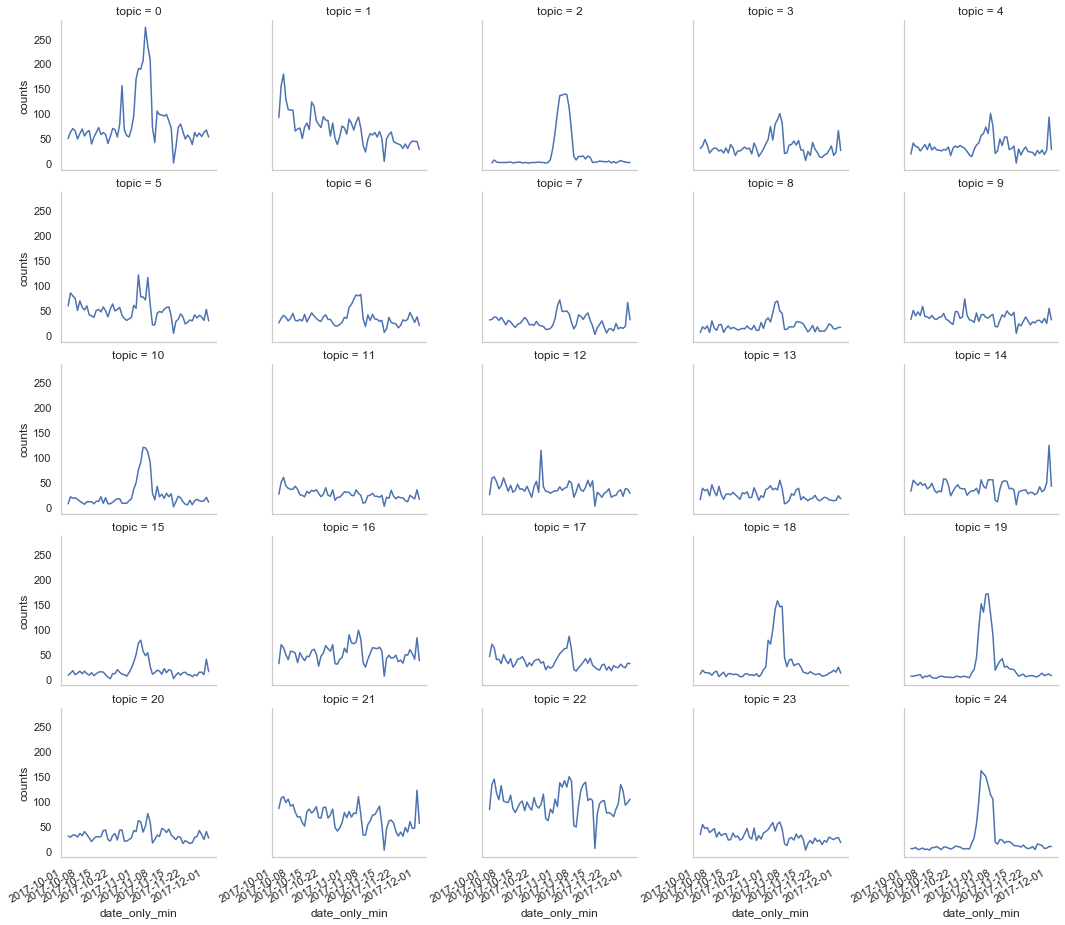

In [120]:
# plot counts of conversations by topic
g = sns.FacetGrid(df_topic_graph[df_topic_graph.date_only_min > '2017-10-03'], col="topic", col_wrap=5, height=3.0, aspect=1.0) 
g = g.map(plt.plot, "date_only_min", "counts", color='b') #sns.lineplot
plt.gcf().autofmt_xdate()
plt.savefig('daily_tweets_by_topic.png');

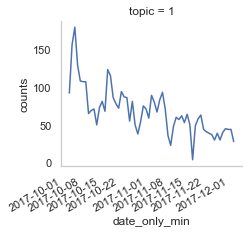

In [121]:
# plot counts of conversations for topic 1
g = sns.FacetGrid(df_topic_graph[(df_topic_graph.date_only_min > '2017-10-03') & (df_topic_graph.topic == 1)], col="topic", col_wrap=5, height=3.0, aspect=1.0) 
g = g.map(plt.plot, "date_only_min", "counts", color='b') #sns.lineplot
plt.gcf().autofmt_xdate();

**Next step is to investigate and further explore some of these topics and compare against Apple's timeline:**  

Battery life:  
- Topic  1:  battery, life, battery life, drain, battery drain  

Screen bug:   
- Topic  14:  screen, lock, lock screen, black, home  

Email bug:  
- Topic  16:  email, got, account, id, received  

Auto-Correct bug:
- Topic  0:  time, day, time day, time type, phone time
- Topic  2:  letter, type letter, eye, letter eye, use
- Topic  10:  shit, fix shit, fucking, fuck, yo
- Topic  18:  glitch, fix glitch, fixed, annoying, keyboard
- Topic  19:  box, seeing, seeing box, fix box, thing
- Topic  21:  message, text, photo, getting, send  
- Topic  24:  type, type letter, time type, come, weird  

Others:  
- Topic  3: issue, fix issue, fixed, issue iphone, issue io  
- Topic  4: problem, fix problem, fixed, problem iphone, solve  
- Topic  5: new, new update, new io, new iphone, new phone  
- Topic  6: work, tried, phone work, work phone, fine  
- Topic  7: updated, updated phone, updated io, updated iphone, seeing  
- Topic  8: need, need help, need fix, fixed, answer  
- Topic  9: app, store, app store, download, open  
- Topic  11: plus, iphone plus, plus io, iphone plus io, io iphone plus  
- Topic  12: music, song, itunes, play, playing  
- Topic  13: dm, sent, sent dm, check, check dm  
- Topic  15: happening, thing, explain, started, started happening  
- Topic  17: turn, wifi, bluetooth, turning, control  
- Topic  20: working, stopped, stopped working, stop, stop working
- Topic  22: sierra, macbook, high, high sierra, pro
- Topic  23: apps, amp, freezing, slow, crashing

### Plot t-SNE

In [52]:
# create tsne model
tsne_model = TSNE(n_components=2, verbose=1, random_state=7, angle=0.99, init='pca', metric='cosine')

# 25-D -> 2-D
tsne_nmf = tsne_model.fit_transform(doc_topic_nmf_convo_user.drop(['text_clean', 'topic'], axis=1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 58578 samples in 0.002s...
[t-SNE] Computed neighbors for 58578 samples in 122.017s...
[t-SNE] Computed conditional probabilities for sample 1000 / 58578
[t-SNE] Computed conditional probabilities for sample 2000 / 58578
[t-SNE] Computed conditional probabilities for sample 3000 / 58578
[t-SNE] Computed conditional probabilities for sample 4000 / 58578
[t-SNE] Computed conditional probabilities for sample 5000 / 58578
[t-SNE] Computed conditional probabilities for sample 6000 / 58578
[t-SNE] Computed conditional probabilities for sample 7000 / 58578
[t-SNE] Computed conditional probabilities for sample 8000 / 58578
[t-SNE] Computed conditional probabilities for sample 9000 / 58578
[t-SNE] Computed conditional probabilities for sample 10000 / 58578
[t-SNE] Computed conditional probabilities for sample 11000 / 58578
[t-SNE] Computed conditional probabilities for sample 12000 / 58578
[t-SNE] Computed conditional probabilities for s

In [70]:
# create dataframe with the two tsne components
tsne_nmf_df = pd.DataFrame({'tsne-2d-one': tsne_nmf[:, 0], 'tsne-2d-two': tsne_nmf[:, 1]})

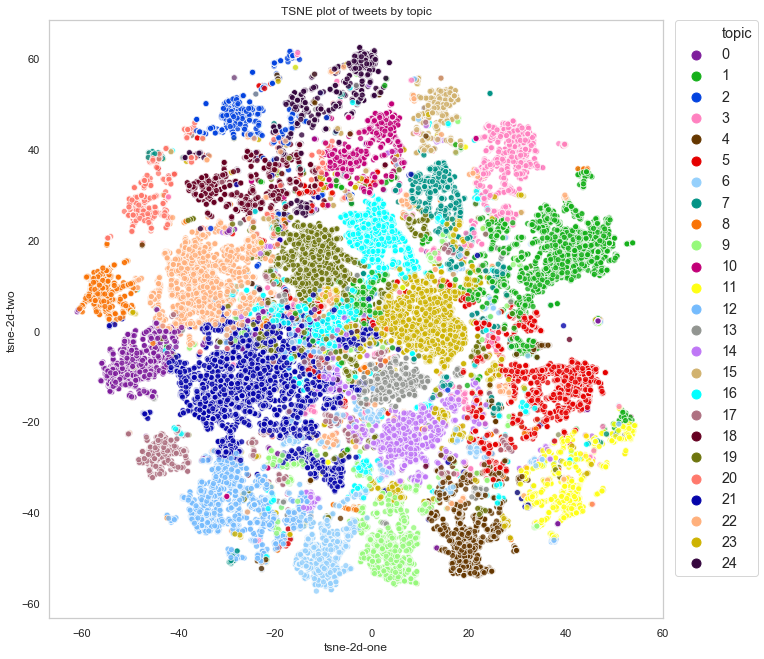

In [193]:
# pick 25 distinguishable colors from seaborn's xkcd (https://xkcd.com/color/rgb/)
color_str = '#7e1e9c, #15b01a, #0343df, #ff81c0, #653700, #e50000, #95d0fc, #029386, #f97306, #96f97b, #c20078, #ffff14, #75bbfd, #929591, #bf77f6, #d1b26f, #00ffff, #ae7181, #650021, #6e750e, #ff796c, #0504aa, #ffb07c, #ceb301, #35063e'
color_list = color_str.split(', ')
custom_palette = sns.set_palette(sns.color_palette(color_list))

# plot scatterplot
plt.figure(figsize=(11,11))
plt.title('TSNE plot of tweets by topic')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df_convo_user.topic,
    palette=sns.color_palette(custom_palette), # "Paired", n_colors=25)
    data=tsne_nmf_df,
    legend="full",
    alpha=0.80
)
#plt.legend(fontsize='large', title_fontsize='10', markerscale=1.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize='large', title_fontsize='10', markerscale=1.5)
plt.savefig('tsne_2d_topic_plot.png');

### CorEx Model

In [122]:
# vectorize the text data using count vectorizer
vectorizer_convo_user = CountVectorizer(stop_words=my_stop_words, max_df=0.80, min_df=0.001, binary=True)
doc_word_convo_user = vectorizer_convo_user.fit_transform(df_convo_user.text_clean)    

In [123]:
# create list of all the words from the vectorized data 
words = list(np.asarray(vectorizer_convo_user.get_feature_names()))

In [124]:
# create corex model (without anchors)
corex_topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

corex_topic_model.fit(doc_word_convo_user, words=words, docs=df_convo_user.text_clean)

# print all topics from the corex model
topics = corex_topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: pro, sierra, macbook, itunes, high, account, icloud, mac, password, store
1: battery, io, update, iphone, phone, new, life, latest, slow, drain
2: screen, button, lock, time, home, apps, control, turn, work, open
3: letter, type, box, fix, text, keyboard, message, symbol, weird, glitch
4: music, app, photo, play, song, video, library, deleted, podcast, playlist
5: customer, issue, soon, possible, loud, service, laughing, product, people, case
6: wifi, bluetooth, connected, connect, connection, watch, series, mode, car, working
7: day, hour, ago, week, month, old, year, charge, today, minute
8: tried, reset, device, using, fine, hard, network, problem, try, worked
9: dm, sent, pay, need, reply, add, money, album, purchased, said


In [125]:
# create corex model with product-specific anchors
corex_topic_model = ct.Corex(n_hidden=4, words=words,
                       max_iter=200, verbose=False, seed=1)

corex_topic_model.fit(doc_word_convo_user, words=words, docs=df_convo_user.text_clean, 
                anchors=[['iphone', 'iphones', 'phone', 'io'], 
                         ['mac', 'macbook', 'macos', 'air'],
                         ['ipad'],                         
                         ['watch', 'watchos']], anchor_strength=5)

# print all topics from the corex model
topics = corex_topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: iphone, io, plus, battery, update, new, phone, latest, updated, life
1: macbook, mac, air, macos, sierra, pro, high, drive, retina, file
2: ipad, app, screen, tried, music, apps, time, wifi, setting, work
3: watch, watchos, support, store, day, customer, issue, ago, series, service


In [126]:
# probability of y given x
corex_topic_model.p_y_given_x[0]

array([1.08525495e-05, 1.06293057e-05, 4.79673455e-04, 9.99999000e-01])

In [127]:
# percent of tweets labelled with a topic
sum(corex_topic_model.labels.any(axis=1)) / df_convo_user.shape[0]

0.5588275461777459

In [128]:
# top documents associated with topic : watch
corex_topic_model.get_top_docs(topic=3, n_docs=5)

[('applesupport uh weirdness watchos update http co', 0.0),
 ('applesupport io beta watchos thanks applesupport order send dm must follow thanks applesupport receiving breath reminder advice many thanks',
  0.0),
 ('applesupport backup watch go phone want restore watch backup need restore phone backup first applesupport yeah watch backup stored phone locally watch technically connected icloud phone applesupport yeah series get meant applesupport yeah would make sense since watch dependent phone apple prolly think needed applesupport would make sense make independent watch used mostly applesupport pretty sure possible change adult account child one applesupport erase phone http co applesupport use itunes',
  0.0),
 ('hey applesupport care bug rn You release quick update fix damn issue hard fix something even calculator watch http co applesupport dm applesupport You check ur phone time week mark say tried call phone rang http co',
  0.0),
 ('applesupport apple watch able control music ap

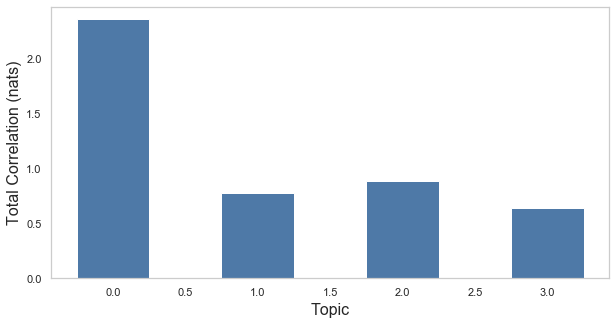

In [129]:
# plot total correlation for each topic
plt.figure(figsize=(10,5))
plt.bar(range(corex_topic_model.tcs.shape[0]), corex_topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

## Predict topic based on user's initial tweet

**Motivation:**  
If we can accurately predict which type of Apple product a user is having an issue with based on the user's initial tweet, then we would be able to automatically route the ticket to the specific team within Apple customer support that covers that product group - if the product type is unclear, then route the ticket to a generalist agent

In [6]:
# vectorize text data using tf-idf vectorizer
my_additional_stop_words = ['apple', 'applesupport', 'want', 'hey', 'hi', 'hello', 'http', 'thank', 'thanks', 'ok', 'yes', 'pls', 'plz', 'know', 'going', 'like', 'really', 'la', 'le', 'que', 'question', 'mark', 'help', 'need', 'issue']
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

tfidf_first_tweet_user = TfidfVectorizer(stop_words=my_stop_words, max_df=0.10, min_df=0.001, ngram_range=(1,3))
doc_word_first_tweet_user = tfidf_first_tweet_user.fit_transform(df_first_tweet_user.text_clean)

df_first_tweet_user_vec = pd.DataFrame(doc_word_first_tweet_user.toarray(), index=df_first_tweet_user.text_clean, columns=tfidf_first_tweet_user.get_feature_names())

In [134]:
df_first_tweet_user_vec.shape

(58578, 1256)

In [135]:
df_first_tweet_user_vec.sample(1)

,ability,able,able use,absolute,absolutely,access,accidentally,account,act,acting,...,wrong,wth,ya,yall,yeah,year,year old,yesterday,yo,youtube
text_clean,,,,,,,,,,,,,,,,,,,,,
applesupport push notification stopped working since updated facebook app checked setting fine idea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Topic Modeling

In [7]:
# use NMF to reduce dimensionality to some # of topics
nmf_model_first_tweet_user = NMF(25)
doc_topic_first_tweet_user = nmf_model_first_tweet_user.fit_transform(doc_word_first_tweet_user)

In [8]:
# topics by words
nmf_model_first_tweet_user.components_.shape

(25, 1256)

In [138]:
# distribution of words by topic
np.unique(doc_topic_first_tweet_user.argmax(axis=1), return_counts = True)[1]

array([4995, 4062, 1662, 1892, 3114, 2172, 1740, 2051, 1420, 1196, 1932,
       2213, 4472,  862, 1728, 1282, 2549, 1392, 1336, 2306,  964, 3164,
       2935, 3683, 3456])

In [9]:
# topics by words into dataframe
topic_word_first_tweet_user = pd.DataFrame(nmf_model_first_tweet_user.components_.round(3),
                         #index = ["component_1", "component_2", "component_3", "component_4"]
                         columns = tfidf_first_tweet_user.get_feature_names())

topic_word_first_tweet_user.head()

,ability,able,able use,absolute,absolutely,access,accidentally,account,act,acting,...,wrong,wth,ya,yall,yeah,year,year old,yesterday,yo,youtube
0,0.000,0.175,0.013,0.000,0.000,0.189,0.06,0.01,0.000,0.000,...,0.159,0.000,0.011,0.002,0.020,0.000,0.000,0.023,0.005,0.106
1,0.000,0.000,0.001,0.000,0.025,0.000,0.00,0.00,0.001,0.003,...,0.020,0.008,0.001,0.001,0.001,0.037,0.014,0.006,0.009,0.016
2,0.000,0.023,0.000,0.000,0.003,0.000,0.00,0.00,0.000,0.000,...,0.000,0.000,0.014,0.003,0.000,0.008,0.000,0.021,0.004,0.000
3,0.007,0.078,0.011,0.000,0.000,0.000,0.00,0.00,0.003,0.011,...,0.070,0.011,0.013,0.007,0.005,0.000,0.000,0.000,0.103,0.000
4,0.001,0.020,0.000,0.008,0.013,0.000,0.00,0.00,0.010,0.038,...,0.028,0.002,0.009,0.007,0.000,0.035,0.018,0.003,0.024,0.000


In [140]:
display_topics(nmf_model_first_tweet_user, tfidf_first_tweet_user.get_feature_names(), 5)


Topic  0
app, store, app store, download, open

Topic  1
battery, life, battery life, drain, battery drain

Topic  2
problem, fix problem, problem iphone, fixed, solve

Topic  3
letter, type, type letter, eye, time type

Topic  4
new, new update, new io, new iphone, new phone

Topic  5
work, phone work, tried, work phone, iphone work

Topic  6
updated, updated phone, updated io, updated iphone, seeing

Topic  7
time, time type, time day, phone time, try

Topic  8
shit, fix shit, fuck, fucking, annoying

Topic  9
plus, iphone plus, plus io, iphone plus io, io iphone plus

Topic  10
screen, lock, lock screen, black, home

Topic  11
music, song, itunes, play, music app

Topic  12
email, got, icloud, photo, account

Topic  13
happening, thing, explain, started, idea

Topic  14
working, stopped, stopped working, stop, stop working

Topic  15
glitch, fix glitch, annoying, fixed, keyboard

Topic  16
apps, freezing, crashing, download, freeze

Topic  17
box, seeing, seeing box, thing, fix box

In [10]:
# create doc topic dataframe
doc_topic_nmf_first_tweet_user = pd.DataFrame(doc_topic_first_tweet_user.round(5),
                             index = df_first_tweet_user.text_clean) 
doc_topic_nmf_first_tweet_user.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
text_clean,,,,,,,,,,,,,,,,,,,,,
applesupport uh weirdness watchos update http co,0.00023,0.00007,0.00019,0.00000,0.00013,0.00020,0.00035,0.0004,0.00000,0.00018,...,0.00000,0.00000,0.0000,0.00000,0.00029,0.00000,0.00000,0.00074,0.00000,0.00010
sure f happening io trying let battery run lie battery life hour applesupport sup widdat http co,0.00076,0.05226,0.00000,0.00070,0.00000,0.00049,0.00000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.0000,0.00122,0.00000,0.00000,0.00000,0.00431,0.09686,0.00000
applesupport good thanks able send least half dozen animoji,0.00025,0.00123,0.00036,0.00131,0.00333,0.00327,0.00014,0.0028,0.00082,0.00028,...,0.00003,0.00244,0.0004,0.00113,0.00000,0.00086,0.00454,0.01809,0.00202,0.00103


### CorEx Model

In [11]:
# train test split
X_train, X_test = train_test_split(df_first_tweet_user, test_size=0.2)

In [12]:
# vectorize text data using count vectorizer
vectorizer_first_tweet = CountVectorizer(stop_words=my_stop_words, max_df=0.50, min_df=0.001, binary=True)
doc_word_first_tweet = vectorizer_first_tweet.fit_transform(X_train.text_clean)
doc_word_first_tweet_test = vectorizer_first_tweet.transform(X_test.text_clean)

In [13]:
# create list of all the words from the vectorized data 
words = list(np.asarray(vectorizer_first_tweet.get_feature_names()))

In [14]:
# create corex model (without anchors)
corex_topic_model = ct.Corex(n_hidden=5, words=words,
                       max_iter=200, verbose=False, seed=1)

corex_topic_model.fit(doc_word_first_tweet, words=words, docs=X_train.text_clean)

# print all topics from the corex model
topics = corex_topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: screen, macbook, pro, wifi, sierra, high, lock, home, ipad, control
1: email, account, card, id, password, fix, en, el, order, mi
2: io, update, new, phone, iphone, latest, freezing, slow, freeze, updated
3: app, music, store, letter, day, photo, apps, download, month, open
4: battery, life, drain, draining, fast, faster, health, quickly, dy, drained


**Now set the anchors to be Apple's core product groups!**

In [15]:
# create corex model with product-specific anchors
corex_topic_model = ct.Corex(n_hidden=4, words=words,
                       max_iter=200, verbose=False, seed=1)

corex_topic_model.fit(doc_word_first_tweet, words=words, docs=X_train.text_clean, 
                anchors=[['iphone', 'iphones', 'phone', 'io'], 
                         ['mac', 'macbook', 'macos', 'air'],
                         ['ipad'],                         
                         ['watch', 'watchos']], anchor_strength=5)

# print all topics from the corex model
topics = corex_topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: iphone, phone, io, battery, update, new, updated, plus, freezing, slow
1: macbook, mac, air, macos, pro, sierra, high, mon, est, une
2: ipad, mini, smart, dock, gen, tip, auto, ur, figure, talk
3: watch, app, screen, music, letter, store, fix, itunes, account, icloud


In [17]:
# probability of y given x
corex_topic_model.p_y_given_x

array([[9.99999000e-01, 2.13201134e-05, 1.00000000e-06, 6.39728028e-01],
       [8.36908298e-05, 2.10974479e-05, 1.00000000e-06, 3.60826548e-02],
       [9.99999000e-01, 2.11073498e-05, 1.00000000e-06, 9.87596655e-01],
       ...,
       [8.36908298e-05, 2.10974479e-05, 1.00000000e-06, 1.73637261e-03],
       [8.36908298e-05, 2.11009072e-05, 1.00000000e-06, 9.12982428e-01],
       [2.96516929e-04, 2.10958346e-05, 1.00000000e-06, 1.52279499e-01]])

In [18]:
# labels for each tweet
corex_topic_model.labels

array([[ True, False, False,  True],
       [False, False, False, False],
       [ True, False, False,  True],
       ...,
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [19]:
# percent of tweets labelled with a topic
sum(corex_topic_model.labels.any(axis=1)) / X_train.shape[0]

0.6773505185438095

In [20]:
# top documents associated with topic : macbook
corex_topic_model.get_top_docs(topic=1, n_docs=5)

[('io disastrous version io ipad air arabic font horrible new control panel worse simple like stuttering slow smooth like applesupport facetime app gone missing',
  0.0),
 ('app store download mac o sierra app store connecting currently running yosemite need trusted link combo pack applesupport',
  0.0),
 ('applesupport radio station play itunes macbook pro software date o itunes help',
  0.0),
 ('hey applesupport You teach fix macbook pro fan keep produce noise', 0.0),
 ('applesupport macbook charger stopped working india purchased lt month ago replacement fix possible buy new one hope could get student discount case purchase one',
  0.0)]

In [21]:
# shape of x train
X_train.shape

(46862, 9)

In [22]:
# shape of labels
corex_topic_model.labels.shape

(46862, 4)

In [23]:
# create dataframe based on labels
df_corex_doc_topic_first_tweet = pd.DataFrame(data=corex_topic_model.labels,   
                                              index=np.array(range(1, corex_topic_model.labels.shape[0]+1)),
                                              columns=np.array(range(1, 5)))  

df_corex_doc_topic_first_tweet.columns = ['iPhone/iOS', 'Mac/macOS', 'iPad/iPadOS', 'Watch/watchOS']

In [24]:
# create number of topics columns
df_corex_doc_topic_first_tweet['number_of_topics'] = df_corex_doc_topic_first_tweet.sum(axis=1)

In [25]:
# normalized distribution of number of topics
df_corex_doc_topic_first_tweet.number_of_topics.value_counts(normalize=True)

1    0.461931
0    0.322649
2    0.206585
3    0.008088
4    0.000747
Name: number_of_topics, dtype: float64

In [26]:
df_corex_doc_topic_first_tweet

,iPhone/iOS,Mac/macOS,iPad/iPadOS,Watch/watchOS,number_of_topics
1,True,False,False,True,2
2,False,False,False,False,0
3,True,False,False,True,2
4,False,False,False,True,1
5,False,False,False,False,0
...,...,...,...,...,...
46858,True,False,False,False,1
46859,True,False,False,False,1
46860,False,False,False,False,0
46861,False,False,False,True,1


### Make predictions on test tweet data

In [27]:
corex_topic_model.predict_proba(doc_word_first_tweet_test)

(array([[9.99999000e-01, 2.05884289e-05, 1.00000000e-06, 9.89924503e-01],
        [9.99999000e-01, 2.11202785e-05, 1.00000000e-06, 9.99999000e-01],
        [1.78638344e-04, 2.10858104e-05, 1.00000000e-06, 1.06321081e-01],
        ...,
        [9.99999000e-01, 7.62355271e-05, 1.00000000e-06, 4.15853294e-02],
        [9.99999000e-01, 2.10356704e-05, 1.00000000e-06, 9.25855893e-01],
        [8.36908364e-05, 2.11804360e-05, 1.00000000e-06, 9.86373578e-01]]),
 array([[-0.56647176,  0.1985115 ,  0.09232168,  0.24890777],
        [-0.65409454,  0.1977331 ,  0.08091005,  0.33979484],
        [ 2.48028395,  0.19778969,  0.08208807, -0.09486964],
        ...,
        [ 0.11226016,  0.10590268,  0.10190689,  0.69469439],
        [-0.8842474 ,  0.19784715,  0.08197048, -0.57036328],
        [ 2.88073434,  0.19761614,  0.0814489 ,  0.35958119]]))

In [28]:
corex_topic_model.predict_proba(doc_word_first_tweet_test)[0]

array([[9.99999000e-01, 2.05884289e-05, 1.00000000e-06, 9.89924503e-01],
       [9.99999000e-01, 2.11202785e-05, 1.00000000e-06, 9.99999000e-01],
       [1.78638344e-04, 2.10858104e-05, 1.00000000e-06, 1.06321081e-01],
       ...,
       [9.99999000e-01, 7.62355271e-05, 1.00000000e-06, 4.15853294e-02],
       [9.99999000e-01, 2.10356704e-05, 1.00000000e-06, 9.25855893e-01],
       [8.36908364e-05, 2.11804360e-05, 1.00000000e-06, 9.86373578e-01]])

In [29]:
corex_topic_model.predict_proba(doc_word_first_tweet_test)[0] > 0.50

array([[ True, False, False,  True],
       [ True, False, False,  True],
       [False, False, False, False],
       ...,
       [ True, False, False, False],
       [ True, False, False,  True],
       [False, False, False,  True]])

In [30]:
np.shape(corex_topic_model.predict_proba(doc_word_first_tweet_test))

(2, 11716, 4)

In [31]:
corex_topic_model.predict(doc_word_first_tweet_test)

array([[ True, False, False,  True],
       [ True, False, False,  True],
       [False, False, False, False],
       ...,
       [ True, False, False, False],
       [ True, False, False,  True],
       [False, False, False,  True]])

In [32]:
np.shape(corex_topic_model.predict(doc_word_first_tweet_test))

(11716, 4)

In [33]:
predictions = pd.DataFrame(corex_topic_model.predict_proba(doc_word_first_tweet_test)[0], columns=['iPhone/iOS', 'Mac/macOS', 'iPad/iPadOS', 'Watch/watchOS'])

predictions = predictions.drop(['topic_product'], axis=1)

In [79]:
predictions.head()

,iPhone/iOS,Mac/macOS,iPad/iPadOS,Watch/watchOS
0,0.999999,0.000021,0.000001,0.989925
1,0.999999,0.000021,0.000001,0.999999
2,0.000179,0.000021,0.000001,0.106321
3,0.999999,0.000021,0.000001,0.611418
4,0.000200,0.000021,0.000001,0.973380


In [80]:
def pred(x):
    if x.max() > 0.50:
        return x.idxmax() 
    else: 
        return 'other'
    
predictions['topic_product'] = predictions.apply(pred, axis=1)
predictions.head()

,iPhone/iOS,Mac/macOS,iPad/iPadOS,Watch/watchOS,topic_product
0,0.999999,0.000021,0.000001,0.989925,iPhone/iOS
1,0.999999,0.000021,0.000001,0.999999,iPhone/iOS
2,0.000179,0.000021,0.000001,0.106321,other
3,0.999999,0.000021,0.000001,0.611418,iPhone/iOS
4,0.000200,0.000021,0.000001,0.973380,Watch/watchOS


In [88]:
X_test_reset = X_test.reset_index()

In [91]:
results_df = pd.merge(X_test_reset, predictions, left_index=True, right_index=True)[['text','topic_product']]

### Check the predicted product group for some of the tweets!

In [128]:
for i in random.sample(range(1, len(results_df)), 3):
    print(results_df.iloc[i].text, ": ", results_df.iloc[i].topic_product, '\n')

@AppleSupport iPhone X 64GB (TMobile) touchscreen unresponsive immediately after 11.1.1 update. Tried resetting via iTunes, reverting back to iOS 11.1 without avail. Screen is on and showing the “Hello” screen. Thoughts? :  iPhone/iOS 

@AppleSupport W/ Update on Iphone 6s.. screen wont black out when making calls.... constantly muting calls, putting on speaker with my face... #fixit :  iPhone/iOS 

@AppleSupport Left home 20 minutes ago with full battery. Now on 28%. What a pile of 💩 your latest IOS is. And in the rind I’ve typed this tweet I’ve lost another 3 %. :  iPhone/iOS 



In [103]:
results_df.iloc[7202]

text             This new iOS update crash my phone @AppleSuppo...
topic_product                                           iPhone/iOS
Name: 7202, dtype: object

In [135]:
results_df.loc[results_df.topic_product=='Mac/macOS']

,text,topic_product
50,@AppleSupport Hi this is my brand new MacBook ...,Mac/macOS
77,@AppleSupport my new macbook pro is completely...,Mac/macOS
113,There is a bug in Final Cut Pro X 10.3.4 with ...,Mac/macOS
164,@AppleSupport how do I get loops/beats that cr...,Mac/macOS
192,Getting a weird bug when if my macbook is conn...,Mac/macOS
...,...,...
11613,Frage an die #Apple Fraktion: Kann ein in der ...,Mac/macOS
11617,@AppleSupport markup in 11.03 on ipad air does...,Mac/macOS
11651,@AppleSupport \n\nUpdating to MacOS High Sierr...,Mac/macOS
11684,@AppleSupport ipad air stuck in reboot loop. ...,Mac/macOS


In [136]:
print(results_df.iloc[50].text, ": ", results_df.iloc[50].topic_product)

@AppleSupport Hi this is my brand new MacBook Pro 3.1 Ghz touchpad and this is from closing the laptop, very disappointed in my purchase!!! https://t.co/szyflSNn7j :  Mac/macOS


In [108]:
results_df.loc[results_df.topic_product=='Watch/watchOS']

,text,topic_product
4,@AppleSupport 😪 whenever i click them the apps...,Watch/watchOS
9,@AppleSupport Thanks but a friend has now help...,Watch/watchOS
10,@AppleSupport if you sell faulty goods you sho...,Watch/watchOS
17,@AppleSupport can you tell me why the payment ...,Watch/watchOS
25,@AppleSupport is there any way to shut off do ...,Watch/watchOS
...,...,...
11698,@AppleSupport Hi - a friend of mine just got a...,Watch/watchOS
11703,@AppleSupport sucks! Getting though to a store...,Watch/watchOS
11709,@AppleSupport This isn't an actual email from ...,Watch/watchOS
11711,@AppleSupport why it Shows me still the Car Ra...,Watch/watchOS


In [137]:
print(results_df.iloc[4].text, ": ", results_df.iloc[4].topic_product)

@AppleSupport 😪 whenever i click them the apps don’t open lmao Ever since this UPDATE! :  Watch/watchOS


In [138]:
results_df.loc[results_df.topic_product=='iPad/iPadOS']

,text,topic_product
44,Anyone else seeing this on the ipad pro with A...,iPad/iPadOS
202,@AppleSupport I have my iPad set to never lock...,iPad/iPadOS
223,So I don't have any notification sounds on my ...,iPad/iPadOS
267,@AppleSupport iOS11 on the iPad is terrible ho...,iPad/iPadOS
328,@AppleSupport Bonsoir... à quand le bug clavie...,iPad/iPadOS
...,...,...
11477,@AppleSupport I have an issue with activating ...,iPad/iPadOS
11595,@AppleSupport I cant access to imessage in an ...,iPad/iPadOS
11671,@AppleSupport how can I stop apps appearing li...,iPad/iPadOS
11687,@AppleSupport if my iPad has warranty can I ta...,iPad/iPadOS


In [141]:
print(results_df.iloc[44].text, ": ", results_df.iloc[44].topic_product)

Anyone else seeing this on the ipad pro with Apple keyboard cover randomly? @AppleSupport https://t.co/DnCdo7wGlW :  iPad/iPadOS


In [142]:
results_df.loc[results_df.topic_product=='other']

,text,topic_product
2,@804174 @804173 @788097 @AppleSupport @135589 ...,other
8,"@AppleSupport hello I️ need help, my AirPods r...",other
11,I wanna know why I’m still getting emails from...,other
13,Why does my battery go down when I charge it A...,other
15,"Amo o BR, mas preciso reconhecer que ele está ...",other
...,...,...
11695,@AppleSupport yo can you guys fix the update s...,other
11696,@AppleSupport @342368 Messenger app keeps free...,other
11699,@AppleSupport looks like a bunch of people hav...,other
11700,@AppleSupport can you please make it so eye ca...,other


In [145]:
print(results_df.iloc[2].text, ": ", results_df.iloc[2].topic_product)

@804174 @804173 @788097 @AppleSupport @135589 it literally takes about three seconds, and if it fixes your issue: it’s not the OS’ fault. :  other
